## Linear Regression using Ridge and Lasso Regularization

In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data
data_lin = pd.read_csv('Encoded_clean_data.csv')
data_lin.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,day_of_week,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_timebin_evening,pickup_timebin_late night,pickup_timebin_midday,pickup_timebin_morning,vendor_id_1,vendor_id_2,weekday_weekday,weekday_weekend
0,1,-73.953918,40.778873,-73.963875,40.771164,400,2,29,1.199074,1,0,0,0,1,0,0,1,0,1
1,2,-73.988312,40.731743,-73.994751,40.694931,1100,3,11,4.129117,1,0,0,1,0,0,1,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1635,2,21,7.250763,1,0,1,0,0,0,0,1,0,1
3,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,5,2.361101,1,0,0,0,0,1,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,848,2,17,4.328540,1,0,0,0,0,1,1,0,1,0


### Linear Regression with no regularization

In [3]:
#seperating independent and dependent variables

x = data_lin.drop(['trip_duration'], axis=1)
y = data_lin['trip_duration']
x.shape, y.shape

((725161, 18), (725161,))

In [4]:
# Importing the train test split function

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

train_x.shape,test_x.shape

((543870, 18), (181291, 18))

In [5]:
#importing Linear Regression and metric mean square error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

### We first fit linear regression without normalize = True

In [6]:
# Creating instance of Linear Regresssion
lr_ = LR()

# Fitting the model
lr_.fit(train_x, train_y)

LinearRegression()

In [7]:
# Predicting over the Test Set and calculating error

test_predict = lr_.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test RMSE = ', k )

Test RMSE =  409.6876136583587


Text(0.5, 1.0, 'Coefficient plot')

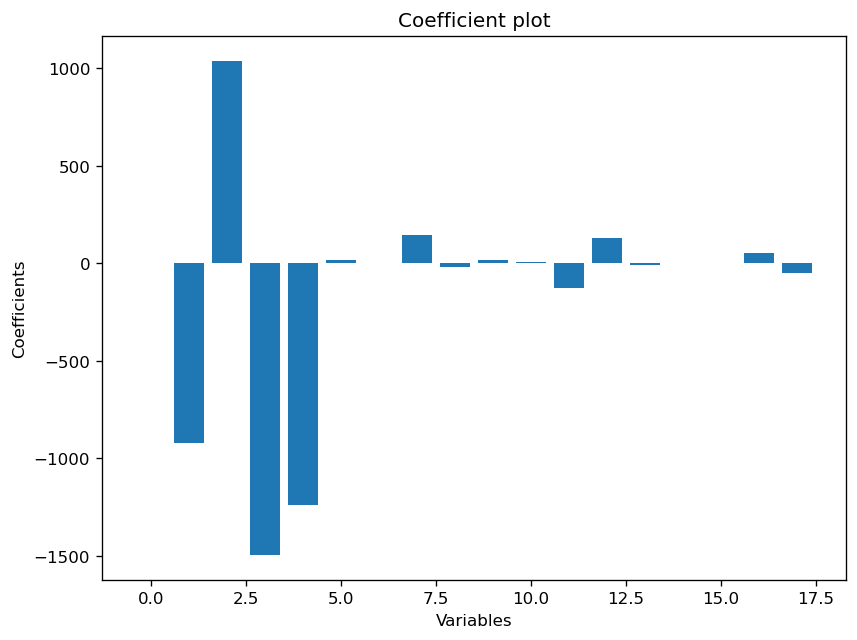

In [8]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr_.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

* As we see, there are certain variables with low impact in non normalized regression. They will adjust once we normalize the data and fit the model

### Now to fit with normalize = True to adjust the scale of the variables

In [9]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [10]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test RMSE = ', k )

Test RMSE =  409.6878492992795


In [11]:
lr.coef_

array([ 3.19237126e+00, -9.19058044e+02,  1.03798597e+03, -1.49636897e+03,
       -1.23857186e+03,  1.85002732e+01,  4.53463530e-01,  1.45013479e+02,
       -9.93616250e+14, -9.93616250e+14,  7.68381384e+14,  7.68381384e+14,
        7.68381384e+14,  7.68381384e+14, -5.10032474e+13, -5.10032474e+13,
       -4.71544040e+13, -4.71544040e+13])

* The coefficients of the variables after normalize fit 

Text(0.5, 1.0, 'Normalized Coefficient plot')

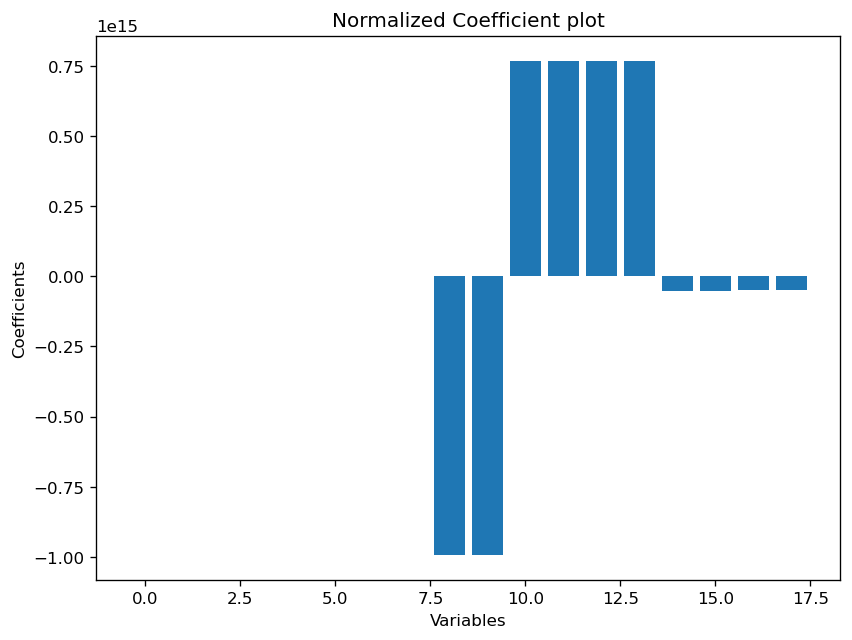

In [12]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

* As we see, after normalize, we see the scaled down variable impact 

#### Plotting residual curve to check if errors have constant variance and are homoscedastic (basic linear regression assumption check)

In [32]:
# Arranging and calculating the Residuals

residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
620841,250,734.375,-484.375
687647,595,790.625,-195.625
549714,3030,1820.375,1209.625
217308,960,963.125,-3.125
677610,603,752.75,-149.75


In [34]:
residuals.residuals[:]

620841    -484.375
687647    -195.625
549714    1209.625
217308      -3.125
677610     -149.75
            ...   
482824   -106.4375
527515    -216.375
612109    -970.375
380952        -508
467262     -15.125
Name: residuals, Length: 181291, dtype: float64

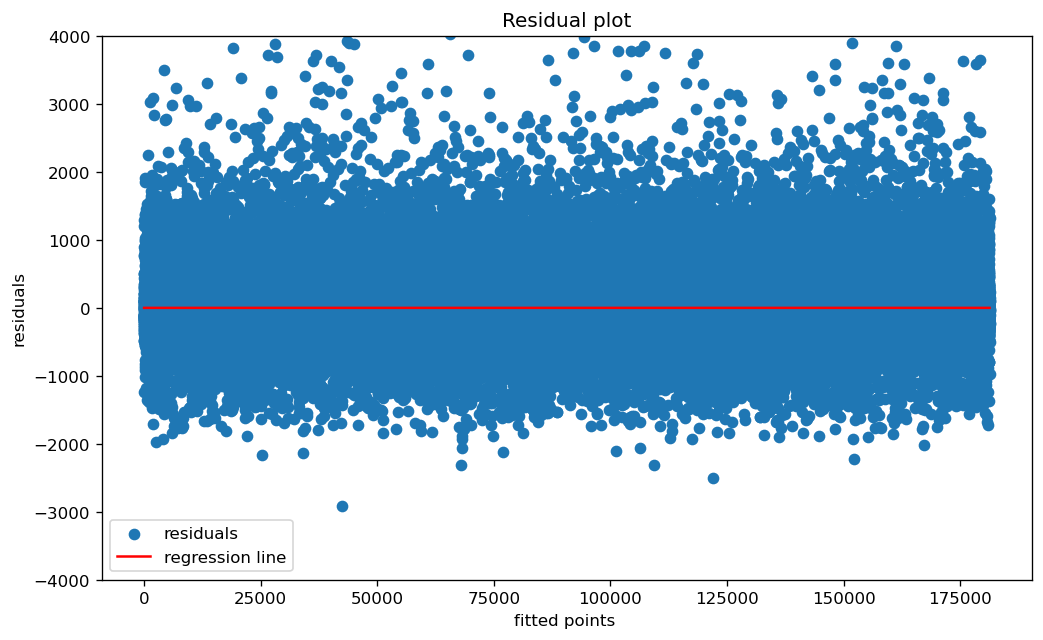

In [35]:
# Plot of the residual curve

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,181291)
k = [0 for i in range(0,181291)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

* As we see, the distribution of residuals is homoscedastic and the variance of errors is nearly constant

## Now to fit with regularization

## RIDGE Regression

In [13]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [14]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [15]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients

def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    
    #Fit the model
    
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    return([np.sqrt(mse(train_y, train_y_pred)), np.sqrt(mse(test_y, test_y_pred))])

In [16]:
# Assign a dataframe to see values of errors on train and test set

df_ridge = pd.DataFrame(columns=["Alpha","Train","Test"])

print("The RMSE values of ridge are as follows-\n")

for a in alpha_ridge:
    
    rid = ridge_regression(train_x,train_y, test_x, test_y, a)
    
    df_ridge = df_ridge.append({"Alpha":a,"Train":rid[0],"Test":rid[1]},ignore_index=True)
    
#Set the display format to be scientific for ease of analysis

pd.options.display.float_format = '{:.7g}'.format

df_ridge

The RMSE values of ridge are as follows-



,Alpha,Train,Test
0,0,415.8347,409.6876
1,1e-08,415.8347,409.6876
2,0.0001,415.8347,409.687
3,0.001,415.8354,409.6817
4,0.01,415.9065,409.696
5,1,487.2126,480.8413
6,5,581.8647,576.7989
7,10,613.7416,609.1181
8,20,634.6423,630.2997
9,25,639.3494,635.069


* As we see that the train error increases as the alpha value increases, which is the same case for test as well

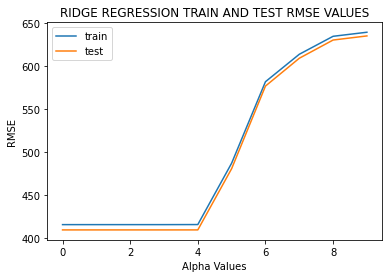

In [17]:
# Plotting the train and test error plot

df_ridge[['Train','Test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('RMSE')
plt.title('RIDGE REGRESSION TRAIN AND TEST RMSE VALUES')
plt.legend(['train', 'test'])

* As we see, applying regularization, the train and test error show the same trend and are very close to each other.
* Since the train and test error are low for low values of alpha, let us consider alpha = 0.0001, and get the score of model

In [18]:
# ridge fit for alpha = 0.0001

ridgeReg = Ridge(alpha=0.0001)

ridgeReg.fit(train_x,train_y)

#train and test scorefor ridge regression

train_score_ridge = ridgeReg.score(train_x, train_y)
test_score_ridge = ridgeReg.score(test_x, test_y)

#### Ridge model score

In [19]:
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.6034189440269233
The test score for ridge model is 0.6103405204913142


## LASSO Regression

In [20]:
#Importing Lasso model from sklearn's linear_model module

from sklearn.linear_model import Lasso

In [21]:
#Define the alpha values to test

alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [22]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients

def lasso_regression(train_x, train_y, test_x, test_y, alpha):
    
    #Fit the model
    
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train_x,train_y)
   
    train_y_pred = lassoreg.predict(train_x)
    test_y_pred = lassoreg.predict(test_x)
    
    return([np.sqrt(mse(train_y, train_y_pred)), np.sqrt(mse(test_y, test_y_pred))])

In [23]:
# Assign a dataframe to see values of errors on train and test set

df_lasso=pd.DataFrame(columns=["Alpha","Train","Test"])

print("The RMSE values of lasso are as follows-\n")

for a in alpha_lasso:
    
    las = lasso_regression(train_x,train_y, test_x, test_y, a)
    
    df_lasso = df_lasso.append({"Alpha":a,"Train":las[0],"Test":las[1]},ignore_index=True)

#Set the display format to be scientific for ease of analysis

pd.options.display.float_format = '{:.7g}'.format

df_lasso

The RMSE values of lasso are as follows-



,Alpha,Train,Test
0,0,415.8347,409.6876
1,1e-10,415.8347,409.6876
2,1e-08,415.8347,409.6876
3,1e-05,415.8347,409.6876
4,0.0001,415.8348,409.6875
5,0.001,415.8472,409.698
6,0.01,416.8931,410.7103
7,1,660.3204,656.312
8,5,660.3204,656.312
9,10,660.3204,656.312


* As we see here also the training and test error are increasing with increasing alpha values

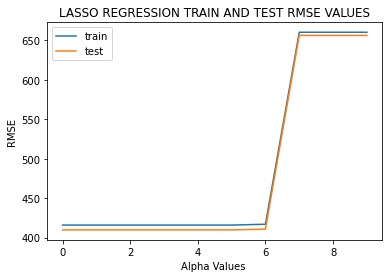

In [24]:
# Plotting the train and test error plot

df_lasso[['Train','Test']].plot()
plt.xlabel('Alpha Values ')
plt.ylabel('RMSE')
plt.title('LASSO REGRESSION TRAIN AND TEST RMSE VALUES')
plt.legend(['train', 'test'])

* Here too, the train and test errors have similar values and trend with a sharp rise between decimal and integer value and it becomes constant again.
* Let us consider alpha = 0.0001 (where train and test are lowest for given alpha values) for this model too like ridge for score

In [25]:
# ridge fit for alpha = 0.0001

lasso = Lasso(alpha = 0.0001)

lasso.fit(train_x,train_y)

#train and test scorefor ridge regression

train_score_ls = lasso.score(train_x,train_y)

test_score_ls = lasso.score(train_x,train_y)

#### Lasso model score

In [26]:
print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))

The train score for lasso model is 0.6034189438818334
The test score for lasso model is 0.6034189438818334


#### Updating the scores for both in the csv file 

In [29]:
# read the csv file that stores the values of scores

score_df = pd.read_csv('score.csv')

# update the lin regression values

score_df = score_df.append(pd.DataFrame({'model':['Ridge_Reg','Lasso_Rig'],'train_score':[train_score_ridge,train_score_ls],'test_score':[test_score_ridge,test_score_ls]}),ignore_index = True)

In [31]:
# updating the csv file

score_df.to_csv("score.csv", index=False)